# Algorithmic Trading Strategy (Bollinger Bands)

## Before we start, let's go through the theory behind this strategy.

### The backing of this strategy revolves around the assumption that the prices of non-derivative assets will trade in a normal distribution. This means that when an asset price’s stock moves greater than 2 standard deviations away from its normal range, it can be considered an outlier that must be traded against.

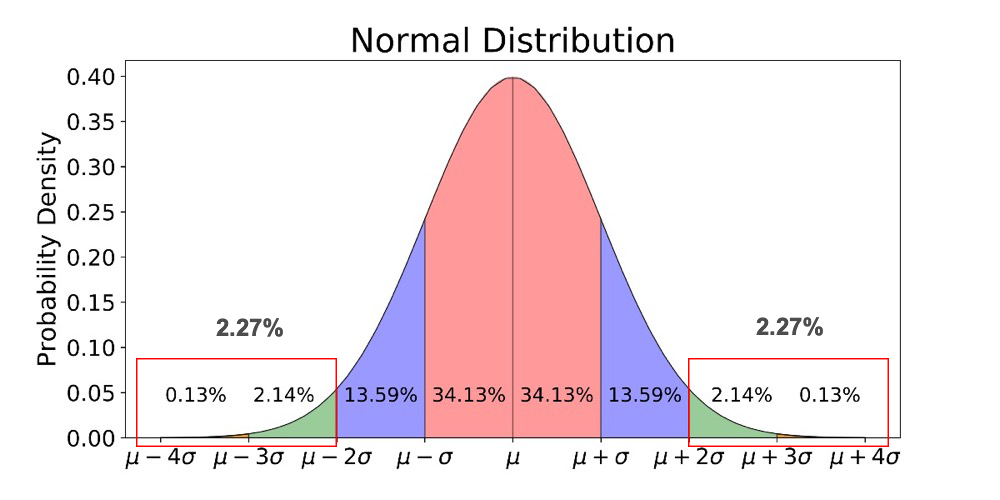

## For Example: If the standard deviation of the close price is larger than +2 , then you should Sell your stock and if the standard deviation of the close price is less than -2 , then you should Buy more.

# 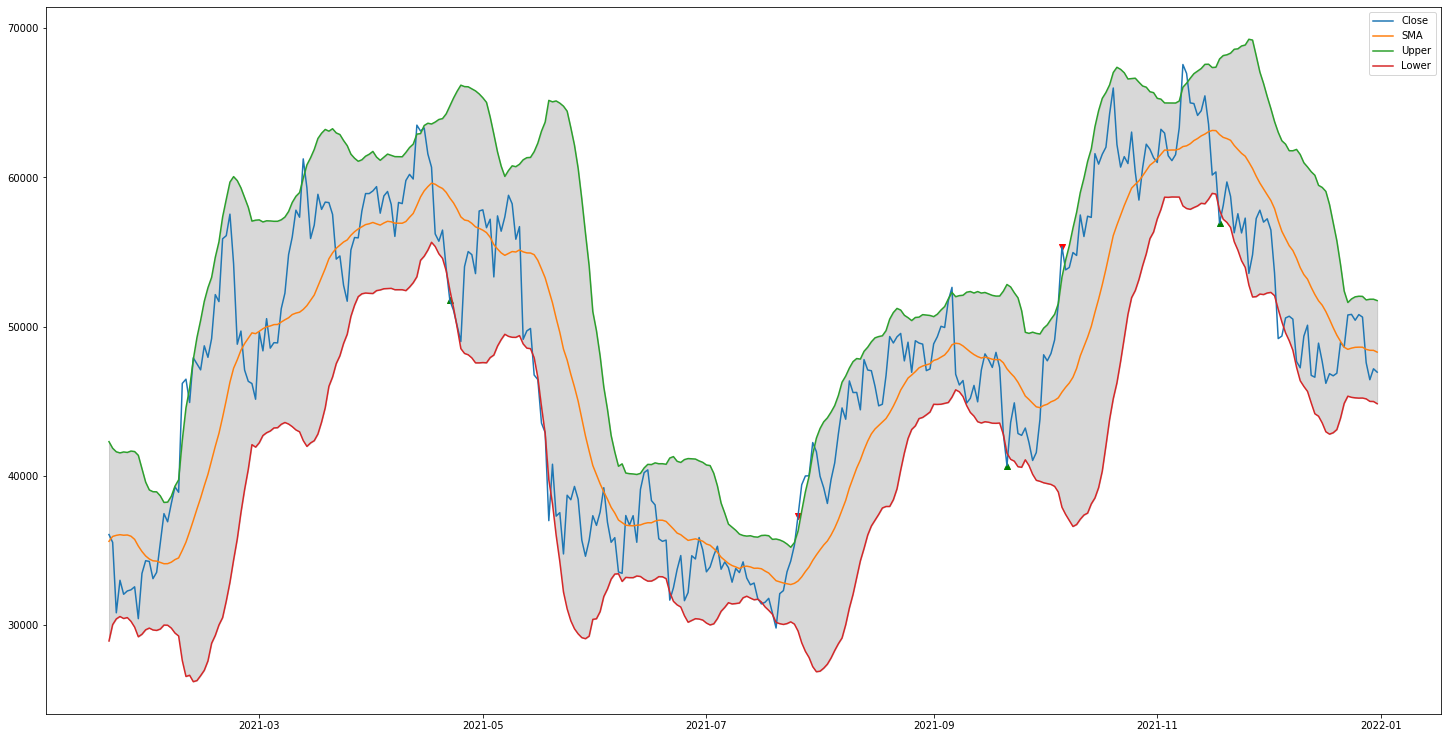

# -------------------------------------------------------------------------

# Bitcoin Price
## Get Bitcoin Data from yfinance (every day for 1 year)

In [30]:
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

data = yf.download(tickers = ('TSLA'), 
                   period = '1y', 
                   interval = '1d',
                   auto_adjust = True)
df = pd.DataFrame(data)
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-15,852.000000,859.900024,819.099976,826.159973,38777600
2021-01-19,837.799988,850.000000,833.000000,844.549988,25367000
2021-01-20,858.739990,859.500000,837.280029,850.450012,25665900
2021-01-21,855.000000,855.719971,841.419983,844.989990,20521100
2021-01-22,834.309998,848.000000,828.619995,846.640015,20066500
...,...,...,...,...,...
2022-01-10,1000.000000,1059.099976,980.000000,1058.119995,30605000
2022-01-11,1053.670044,1075.849976,1038.819946,1064.400024,22021100
2022-01-12,1078.849976,1114.839966,1072.589966,1106.219971,27913000


In [31]:
## Simple Moving Average (SMA) for 20 days
df['SMA'] = df.Close.rolling(window=22).mean()

## standard deviations for 20 days
df['stddev'] = df.Close.rolling(window=22).std()

## Upper is 2 standard deviations above SMA and Lower is 2 standard deviations below SMA
df['Upper'] = df.SMA + 1 * df.stddev
df['Lower'] = df.SMA - 1 * df.stddev

## Generate the Buy_signal and Sell_signal based on the strategy
df['Buy_signal'] = np.where(df.Close < df.Lower, True, False)
df['Sell_signal'] = np.where(df.Close > df.Upper, True, False)

## Remove nan value
df = df.dropna()
df

,Open,High,Low,Close,Volume,SMA,stddev,Upper,Lower,Buy_signal,Sell_signal
Date,,,,,,,,,,,
2021-02-17,779.090027,799.840027,762.010010,798.150024,25996500,839.961814,26.844682,866.806496,813.117132,True,False
2021-02-18,780.900024,794.690002,776.270020,787.380005,17957100,838.199088,28.982239,867.181327,809.216850,True,False
2021-02-19,795.000000,796.789978,777.369995,781.299988,18958300,835.324088,31.361717,866.685806,803.962371,True,False
2021-02-22,762.640015,768.500000,710.200012,714.500000,37269700,829.144542,40.346275,869.490818,788.798267,True,False
2021-02-23,662.130005,713.609985,619.000000,698.840027,66606900,822.501362,48.766474,871.267836,773.734888,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,1000.000000,1059.099976,980.000000,1058.119995,30605000,1030.843625,76.109065,1106.952690,954.734560,False,False
2022-01-11,1053.670044,1075.849976,1038.819946,1064.400024,22021100,1033.598172,76.180279,1109.778451,957.417894,False,False
2022-01-12,1078.849976,1114.839966,1072.589966,1106.219971,27913000,1037.652261,77.616263,1115.268524,960.035997,False,False


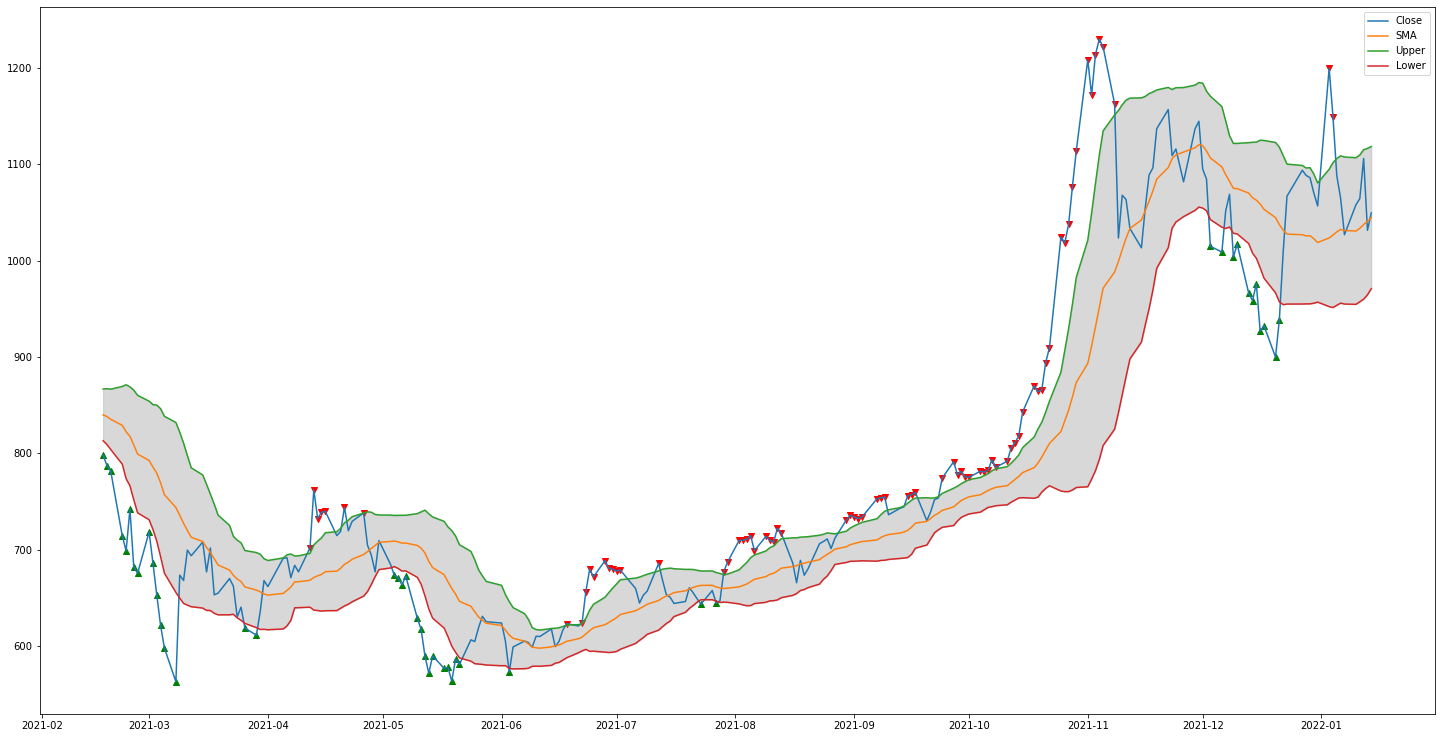

In [32]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.index[df.Buy_signal], df[df.Buy_signal].Close, marker='^', color = 'g')
plt.scatter(df.index[df.Sell_signal], df[df.Sell_signal].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

# Improve our buy and sell signal (Buy 1 Sell 1)

In [33]:
## Define new lists and stock_on_hand

buy = []
sell = []
stock_on_hand = False

## change multiple buy and sell to only 1 buy and 1 sell

for i in range(len(df)):
    if df.Close[i] < df.Lower[i]:
        if stock_on_hand == False:
            buy.append(i)
            stock_on_hand = True
    elif df.Close[i] > df.Upper[i]:
        if stock_on_hand == True:
            sell.append(i)
            stock_on_hand = False

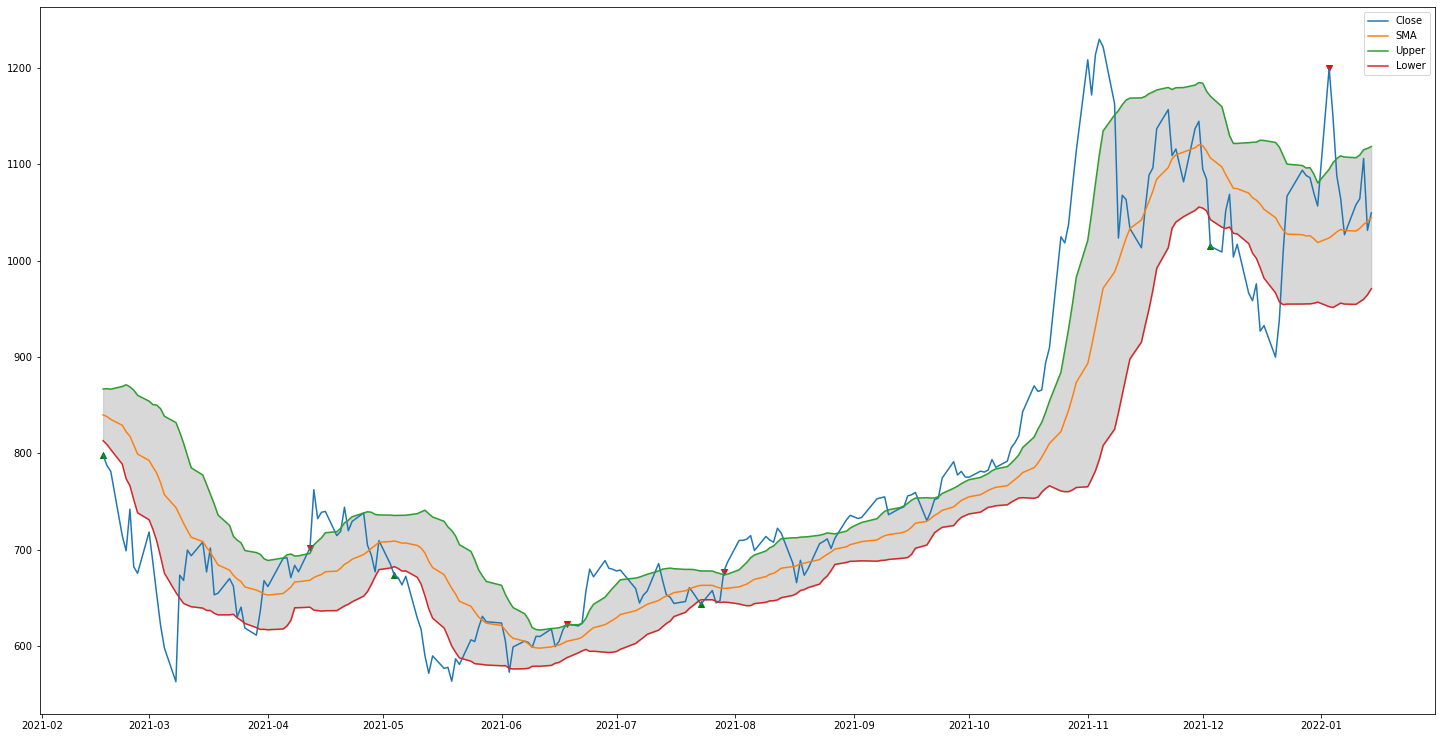

In [34]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.iloc[buy].index, df.iloc[buy].Close, marker='^', color = 'g')
plt.scatter(df.iloc[sell].index, df.iloc[sell].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

# Check if you can make profit based on this strategy

In [35]:
share = 1000
profit = 0

for i in range(len(sell)):
    
    profit = profit - (df.iloc[buy[i]].Close * share)
    profit = profit + (df.iloc[sell[i]].Close * share)
    
profit

72320.00732421875